In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("8-fraud_detection.csv")

In [3]:
df.head()

,transaction_amount,transaction_risk_score,is_fraud
0,1.879910,-1.485035,0
1,0.377083,-2.238585,0
2,1.354312,-2.664638,0
3,-0.509843,-1.502950,0
4,0.863561,-1.906364,0


In [4]:
df.shape

(10000, 3)

In [5]:
df["is_fraud"].value_counts()

is_fraud
0    9846
1     154
Name: count, dtype: int64

In [6]:
# imbalanced dataset

In [7]:
X = df.drop("is_fraud", axis=1)
y = df['is_fraud']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15) 

In [9]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [10]:
penalty = ["l1","l2","elasticnet"]
c_values = [100,10,1,0.1,0.01]
solver = ["newton-cg", "lbfgs", "libliner", "sag", "saga", "newton-cholesky"]
class_weight = [{0:w, 1:y} for w in [1,10,50,200] for y in [1,10,50,100]]

In [11]:
params = dict(penalty = penalty, C= c_values, solver = solver, class_weight = class_weight)

In [16]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
cv = StratifiedKFold()
grid = GridSearchCV(estimator = model, param_grid = params, scoring = "accuracy", cv=cv)

In [17]:
import warnings
warnings.filterwarnings("ignore")

In [18]:
grid.fit(X_train,y_train)

,estimator,LogisticRegression()
,param_grid,"{'C': [100, 10, ...], 'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10}, ...], 'penalty': ['l1', 'l2', ...], 'solver': ['newton-cg', 'lbfgs', ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,StratifiedKFo...shuffle=False)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [19]:
y_pred = grid.predict(X_test)

In [22]:
y_pred


array([0, 0, 0, ..., 0, 0, 0], shape=(2500,))

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [24]:
score = accuracy_score(y_pred,y_test)
print("score: ", score)
print(classification_report(y_pred,y_test))
print("confusion matrix: \n", confusion_matrix(y_pred,y_test))



score:  0.99
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2481
           1       0.42      0.84      0.56        19

    accuracy                           0.99      2500
   macro avg       0.71      0.92      0.78      2500
weighted avg       0.99      0.99      0.99      2500

confusion matrix: 
 [[2459   22]
 [   3   16]]


In [25]:
# ROC, AUC

In [28]:
model_prob = grid.predict_proba(X_test)

In [29]:
model_prob

array([[0.99586436, 0.00413564],
       [0.85287009, 0.14712991],
       [0.952308  , 0.047692  ],
       ...,
       [0.98898975, 0.01101025],
       [0.98454137, 0.01545863],
       [0.99758734, 0.00241266]], shape=(2500, 2))

In [30]:
model_prob = model_prob[:,1] # probabilities for the positive (fraud) class

In [31]:
model_prob

array([0.00413564, 0.14712991, 0.047692  , ..., 0.01101025, 0.01545863,
       0.00241266], shape=(2500,))

In [33]:
from sklearn.metrics import roc_auc_score, roc_curve

In [34]:
model_auc = roc_auc_score(y_test, model_prob)

In [35]:
model_auc

0.7392898371029116

In [39]:
# model false positive rate
# model true positive rate
model_fpr, model_tpr, tresholds = roc_curve(y_test, model_prob)

<function matplotlib.pyplot.show(close=None, block=None)>

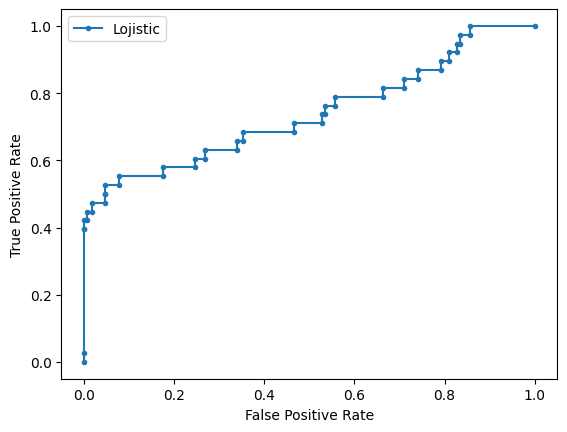

In [40]:
plt.plot(model_fpr, model_tpr, marker=".", label="Lojistic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show